## 高频单词的聚类与分类
    本项目根据英语语料库获取了英语语言当中部分高频且具有实际意义的英语单词，并根据这些单词的特征信息，通过计算比较单词与单词之间的余弦相似度，对单词进行分类或聚类的操作。最终使用测试数据集合进行验证。

0. 导入相应的包

In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import pandas as pd

1. 数据读取
    文件详情:
    **word1.csv** 中包含44个高频的英语单词
    **feat_mcrae.csv** 中显示了特征信息的列表
    **matrix1 bnc.csv**  44×2497 和**matrix1_mcrae.csv** 44×2526的矩阵分别对了上述文件中的特征信息,
    给出了具体的数值,以表示每个单词对于这个特性的相关程度。
    其中BNC是来自英语国家语料库的数据,根据文章内容的单词出现频率计算得出 (context window of ± 5 words. )
    McRae是通过通过调查普通人对单词的认识和判断得到的数据

In [10]:
pd.set_option('display.max_columns', 12) #设置pandas的显示列数
#读取数据
words1 = pd.read_csv("./words1.csv", index_col=0).values.flatten() 
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()
matrix1_mcrae = pd.read_csv("./matrix1_mcrae.csv", index_col=0).values
matrix1_bnc = pd.read_csv("./matrix1_bnc.csv", index_col=0).values

In [9]:
#测试读取是否成功
print(words1)
print(feats_mcrae)
print(matrix1_mcrae)
print(matrix1_bnc)

['banana' 'boat' 'bottle' 'bowl' 'car' 'cat' 'cherry' 'chicken' 'chisel'
 'corn' 'cow' 'cup' 'dog' 'duck' 'eagle' 'elephant' 'hammer' 'helicopter'
 'kettle' 'knife' 'lettuce' 'lion' 'motorcycle' 'mushroom' 'onion' 'owl'
 'peacock' 'pear' 'pen' 'pencil' 'penguin' 'pig' 'pineapple' 'potato'
 'rocket' 'scissors' 'screwdriver' 'ship' 'snail' 'spoon' 'swan'
 'telephone' 'truck' 'turtle']
['a_baby_bird' 'a_baby_cow' 'a_baby_deer' ... 'worn_with_suits'
 'worn_with_suspenders' 'worn_with_ties']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  3   4   9 ...   0   0   0]
 [ 95  68  50 ...   0   0   0]
 [ 49  35  70 ...   0   0   0]
 ...
 [130  57  62 ...   0   0   0]
 [ 13  10   8 ...   0   0   0]
 [  3   5   5 ...   0   0   0]]


2. 对数据进行聚类操作
    对bnc单词特征数据使用**层次聚类**的算法
    参考scipy文档,使用scipy库中的cluster的linkage方法,通过改变参数实现三种不同的层次聚类
    https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy 对三种不同方式的结果进行对比.

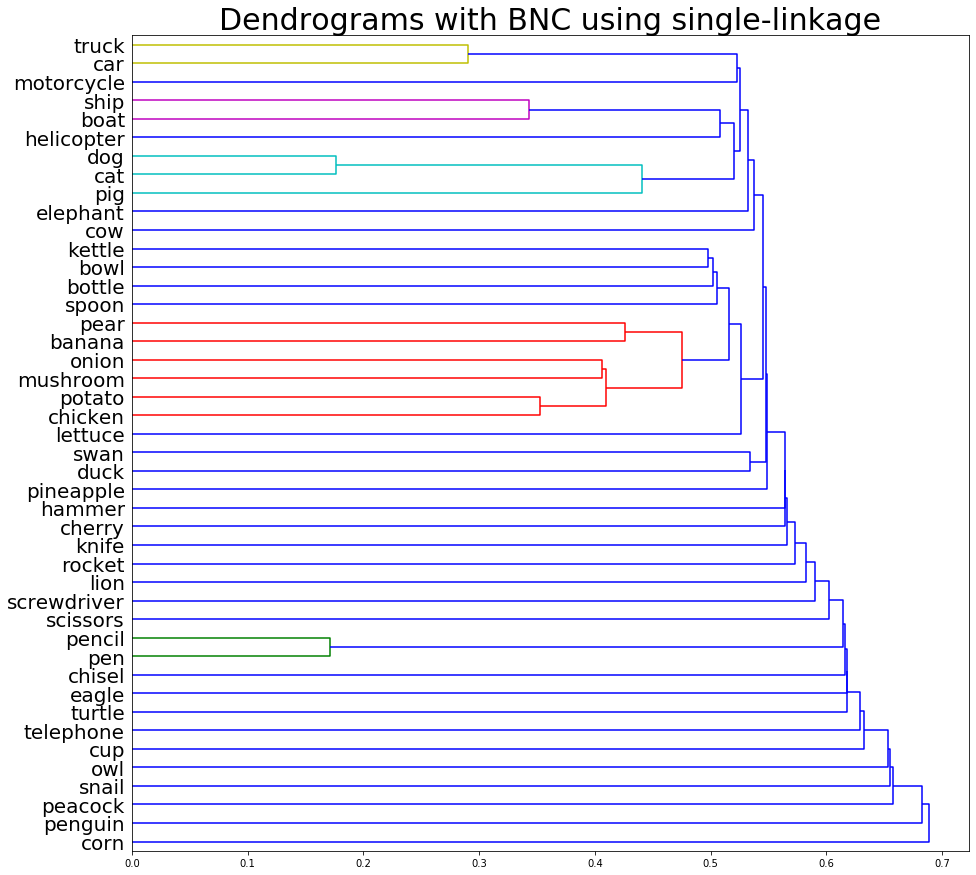

In [24]:
#single-linkage
TreeSingleBNC = linkage(matrix1_bnc,'single','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using single-linkage",fontsize=30)
dendrogram(TreeSingleBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

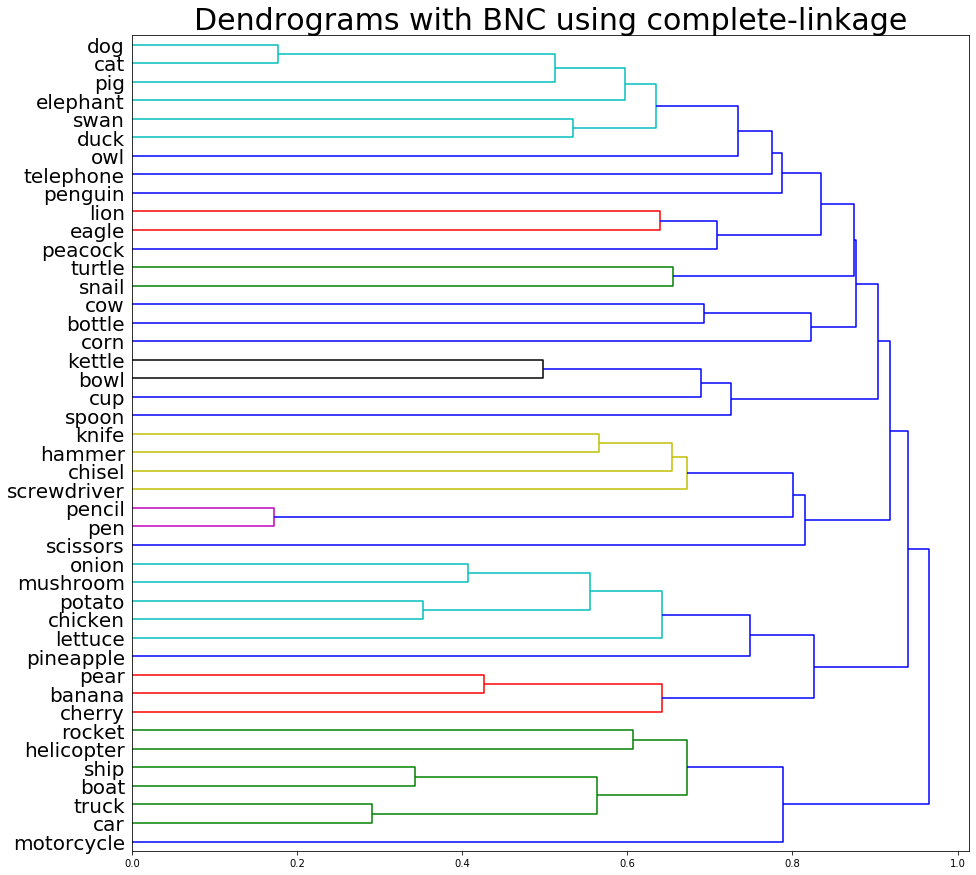

In [23]:
#Complete linkage 
TreeCompleteBNC = linkage(matrix1_bnc,'complete','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using complete-linkage",fontsize=30)
dendrogram(TreeCompleteBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

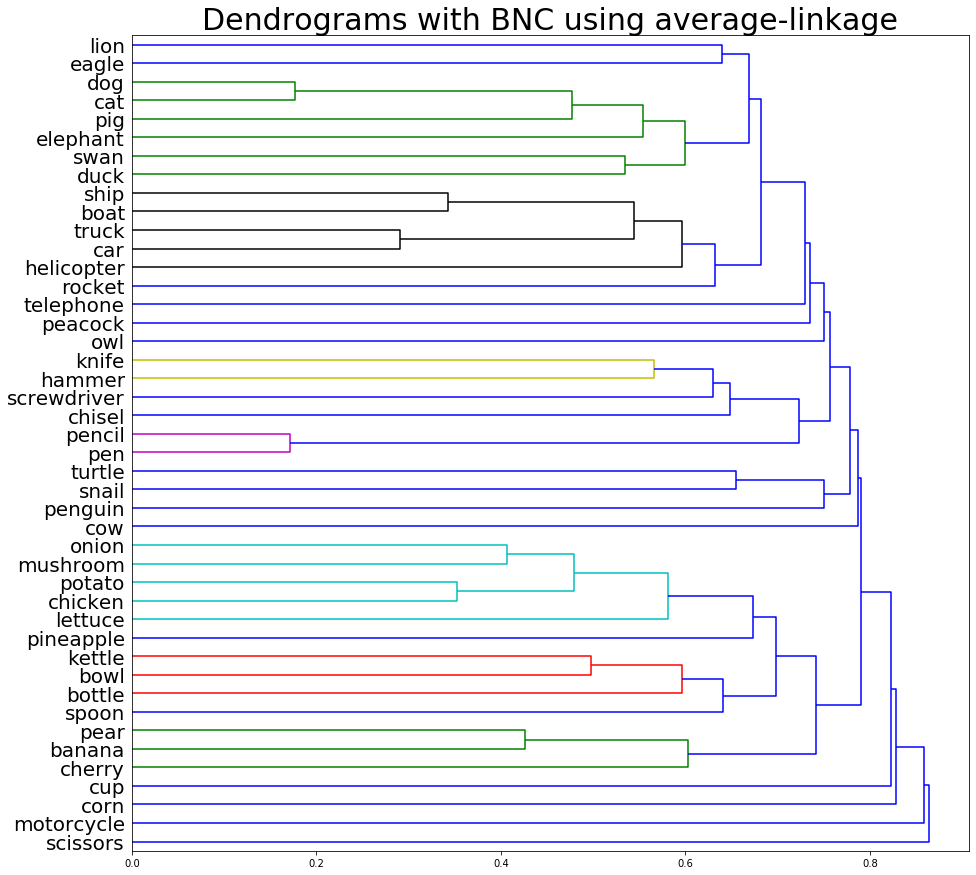

In [29]:
#Average-linkage
TreeAverageBNC = linkage(matrix1_bnc,'average','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using average-linkage",fontsize=30)
dendrogram(TreeAverageBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

我们拿单词corn举例:

    Simple-linkage方法 corn在最后一步,和上述其余所有合并的单词的集合进行合并<br>
    Complete-linkage方法 corn在和{cow,bottle}的集合进行合并<br>
    Average-linkage方法 corn在倒数第三步与除了motorcycle和scissors外的单词的集合合并<br><br>
    
分析:

    产生这样差异的原因是计算的方法:
    
    在Simple-linkage中,算法分别在两个不同的簇中选择两个最近,也就是相似度最高的单词直接的进行合并,所以corn在simple-linkage方法中在最后一步,是由于在数据集中没有和corn较为相似的单词.也就是说,corn与其他单词的特征差异比任何其余两个单词之间的差异都要高.
    
    在Complete-linkage中,算法首先计算最远距离的单词对分为两个簇,并选择当中的最短距离.也就是说corn和bottle有很大的差异,但其余簇与corn的差异相比而言还要更大.
    
    在Average-linkage中算法计算平均的距离来进行分类。
    
总的来说:

    Single-linkage 聚类法
        类间距离等于两类对象之间的最小距离。
    Complete-linkage 聚类法
        组间距离等于两组对象之间的最大距离。
    Average-linkage 聚类法
          组间距离等于两组对象之间的平均距离。
结论:
    
    使用不同的linkage方法会得到不同的聚类结果


    与此同时,对mcrae单词特征数据使用上述层次聚类的算法,对比对两个不同特征集的结果异同

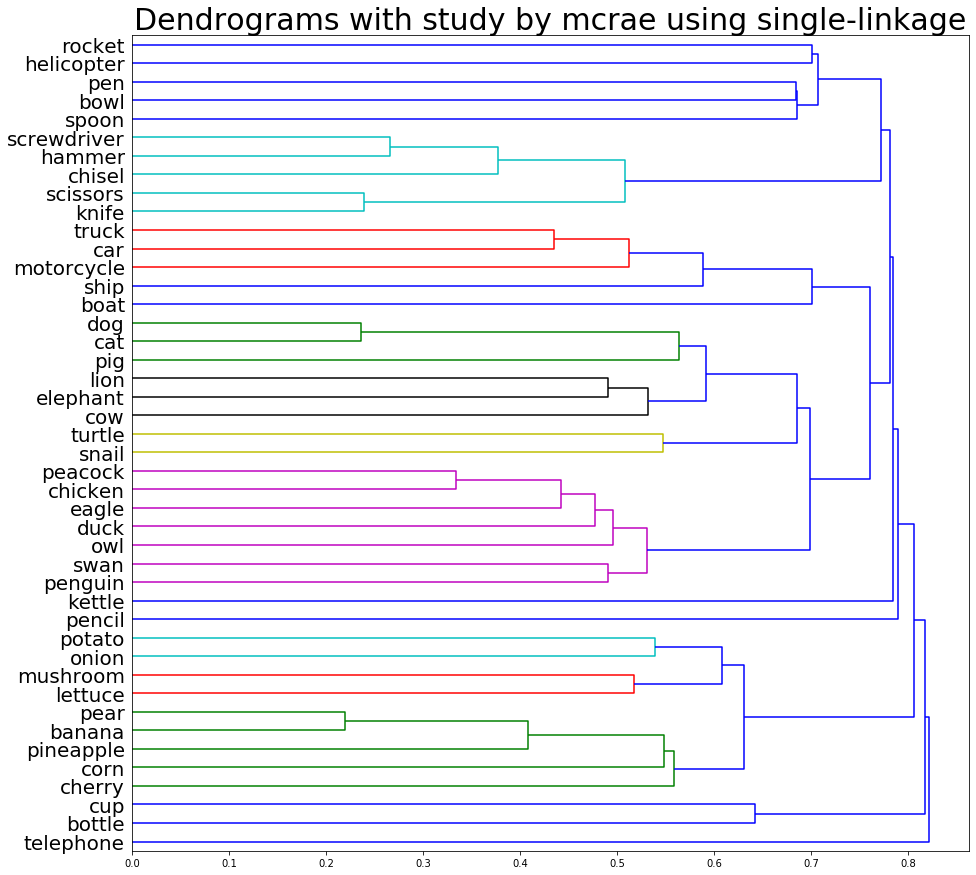

In [26]:
TreeSingleMR = linkage(matrix1_mcrae,'single','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using single-linkage",fontsize=30)
dendrogram(TreeSingleMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

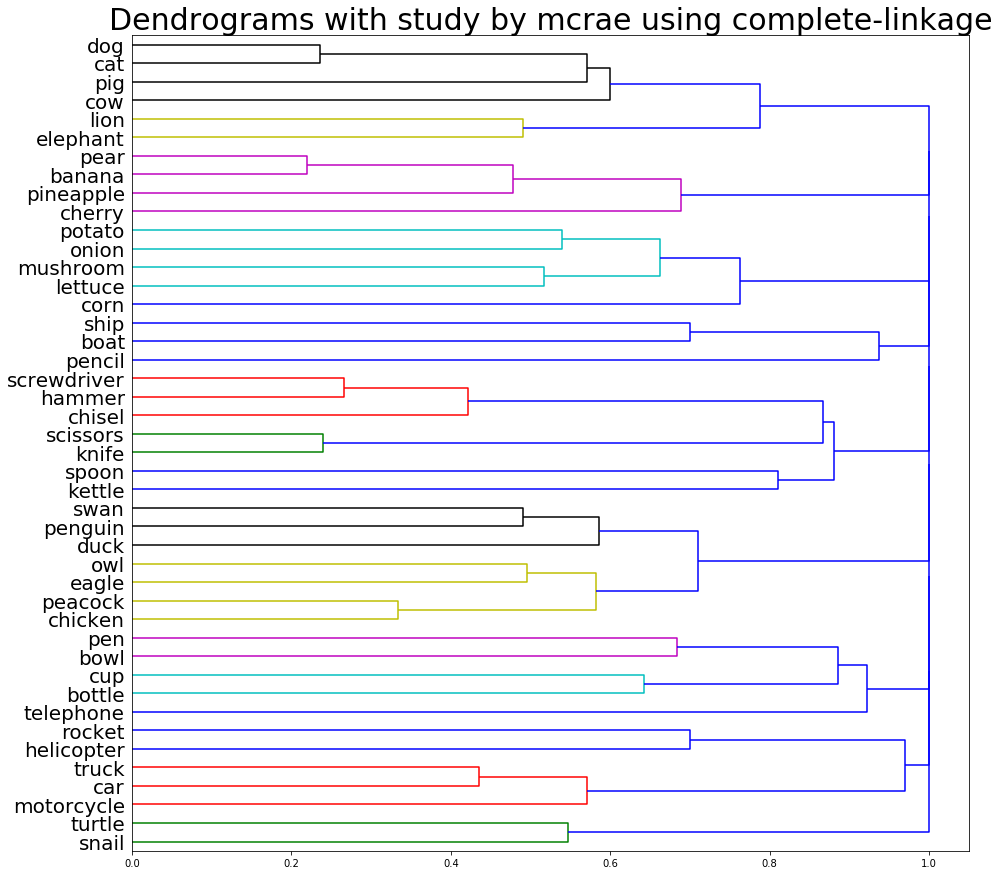

In [27]:
TreeCompleteMR = linkage(matrix1_mcrae,'complete','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using complete-linkage",fontsize=30)
dendrogram(TreeCompleteMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

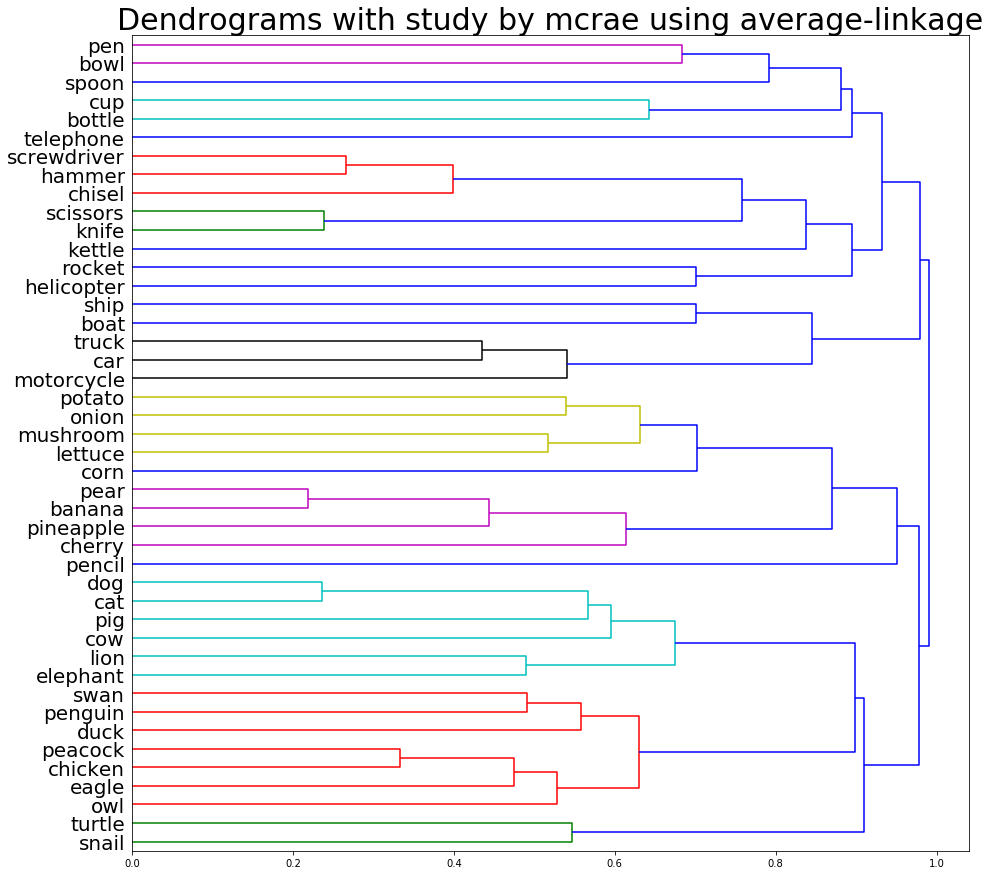

In [28]:
TreeAverageMR = linkage(matrix1_mcrae,'average','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using average-linkage",fontsize=30)
dendrogram(TreeAverageMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()